# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [11]:
df1=pd.read_csv('df_2.csv')
df1

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,0,1,0,0,1,0,0,0,0
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,1,0,0,0,0,1,0,0,0,0
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,0,0,0,0,0,1,0,0,0,0
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,True,...,1,0,0,0,0,1,0,0,0,0


In [18]:
y=df1.mau
x=df1.drop('mau', axis=1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [20]:
clf_tr = DecisionTreeClassifier(random_state=100)
clf_tr = clf_tr.fit(x_train,y_train)

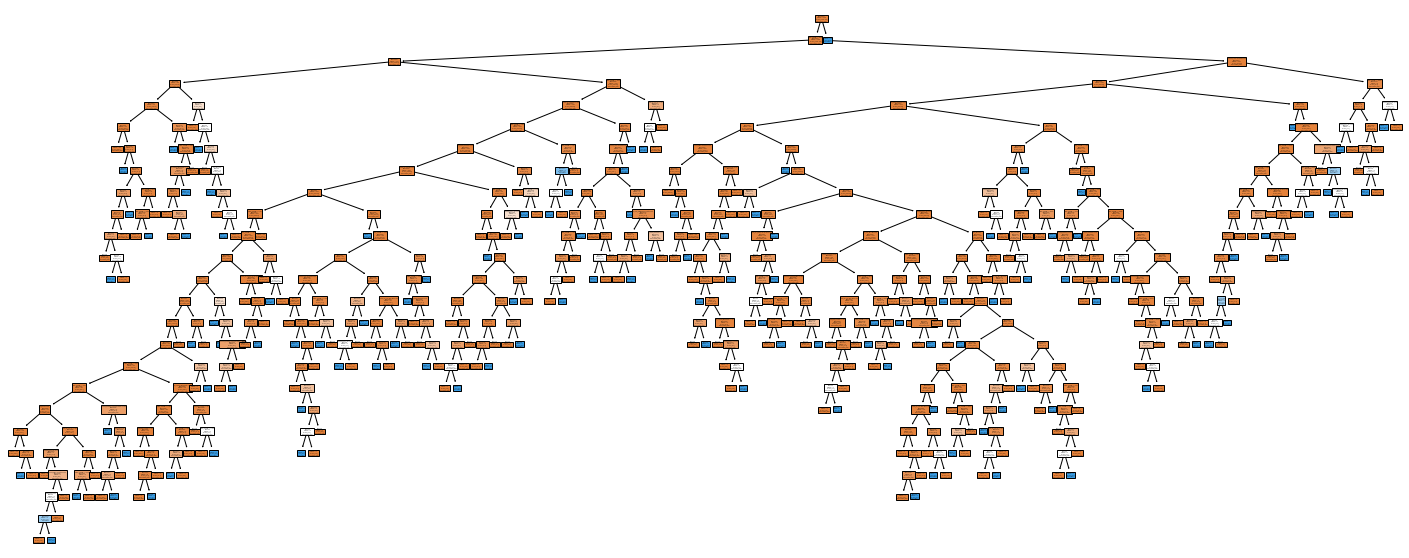

In [21]:
plt.figure(figsize=(25, 10))
plot_tree(clf_tr,
          filled=True,
          class_names=['possui_email', 'mau'],
          feature_names=x.columns);

In [22]:
y_chapeu_teste = clf_tr.predict(x_test)
y_chapeu_teste

array([False, False, False, ..., False, False, False])

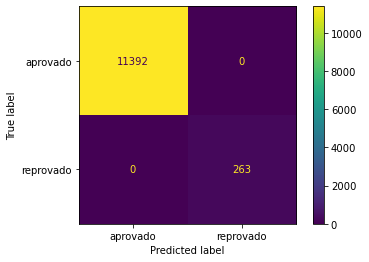

In [23]:
plot_confusion_matrix(clf_tr, x_train,y_train, display_labels=['aprovado', 'reprovado']);

In [24]:
y_chapeu_teste2 = clf_tr.predict(x_train)
accuracy_score(y_train, y_chapeu_teste2)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

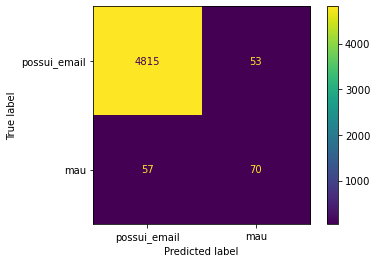

In [25]:
plot_confusion_matrix(clf_tr, x_test,y_test, display_labels=['possui_email', 'mau']);

In [26]:
accuracy_score(y_test, y_chapeu_teste)

0.977977977977978

In [151]:
print('diferença_acuracia=', 1.0-0.98)

diferença_acuracia= 0.020000000000000018


In [27]:
clf_test = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5 ,random_state=123)
clf_test = clf_test.fit(x_train,y_train)
predict = clf_test.predict(x_test)
accuracy_score(y_test, predict)

0.9853853853853853

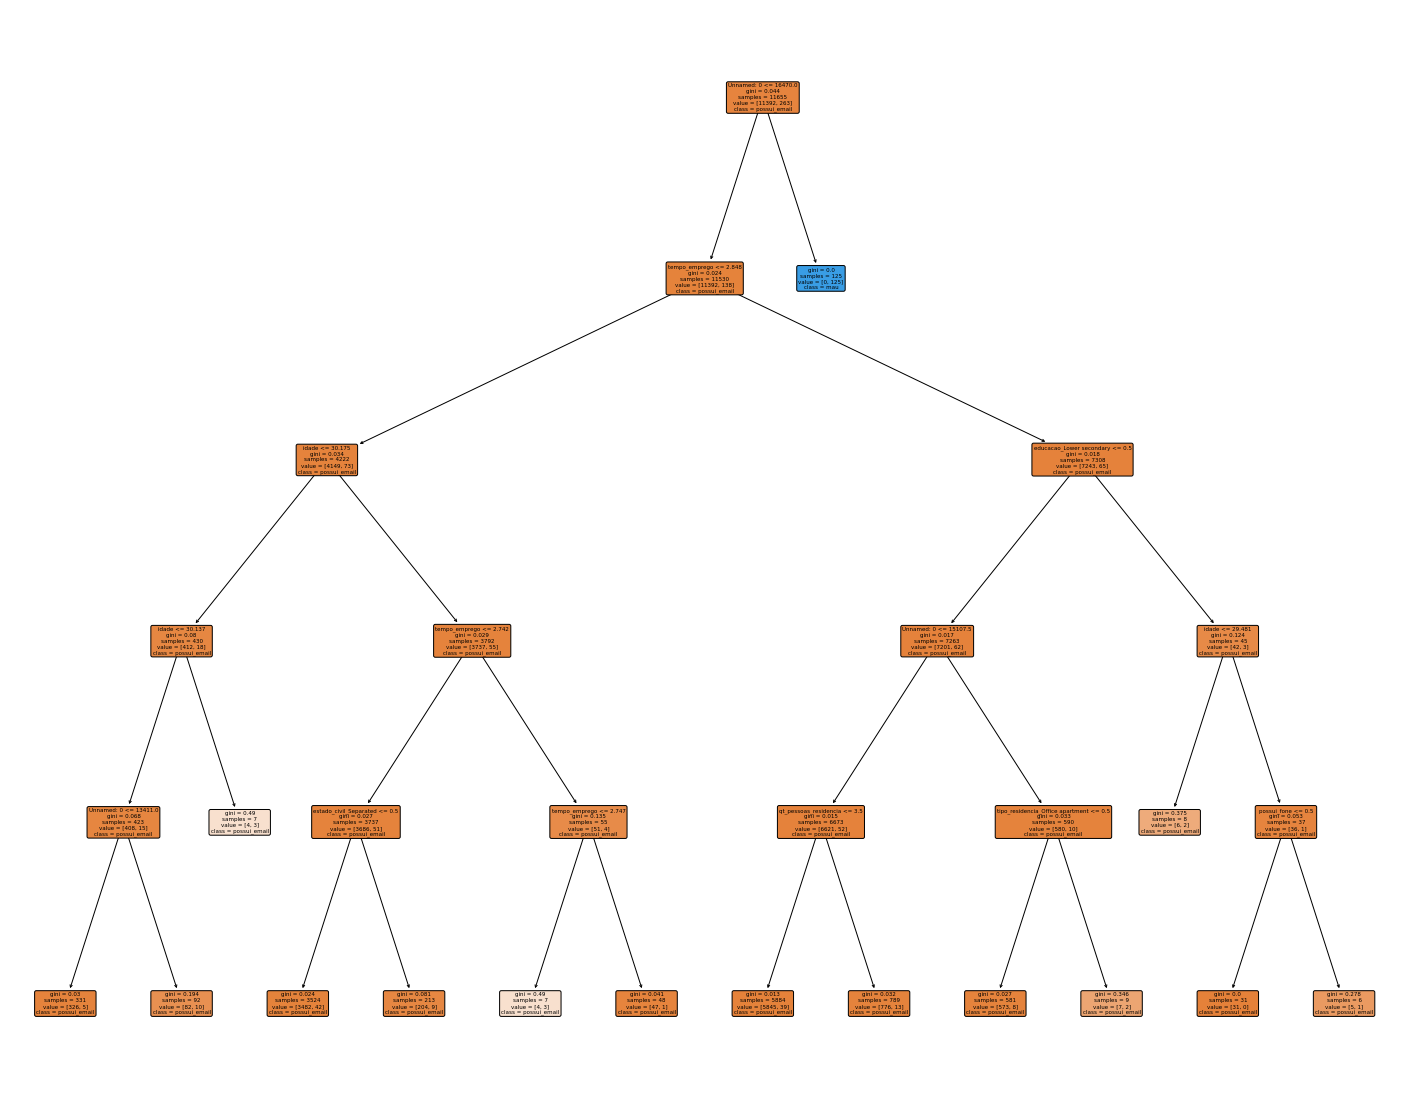

In [28]:
plt.figure(figsize=[25,20])
plot_tree(clf_test,
         filled=True,
         rounded=True,
         class_names=['possui_email', 'mau'],
         feature_names=x_train.columns);

# 9. Post pruning 

In [29]:
clf2 = DecisionTreeClassifier(random_state=100)
path = clf2.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf2 = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf2.fit(x_train, y_train)
    clfs.append(clf2)

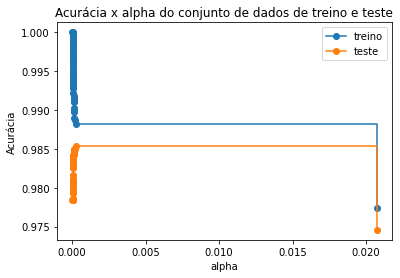

In [31]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [32]:
x3=pd.DataFrame({'alpha': ccp_alphas.tolist(), 'score': test_scores})

In [33]:
x3.max()

alpha    0.020715
score    0.985385
dtype: float64

In [34]:
clf_podada = DecisionTreeClassifier(random_state=100, ccp_alpha=0.020715)

0.9853853853853853

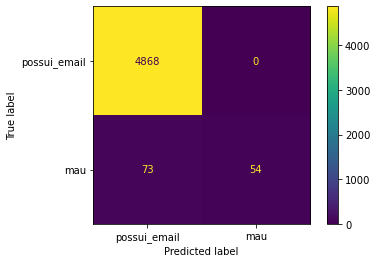

In [35]:
clf_podada=clf_podada.fit(x_train, y_train)
predict = clf_podada.predict(x_test)
plot_confusion_matrix(clf_podada, x_test, y_test, display_labels=['possui_email', 'mau']);
accuracy_score(y_test, predict)

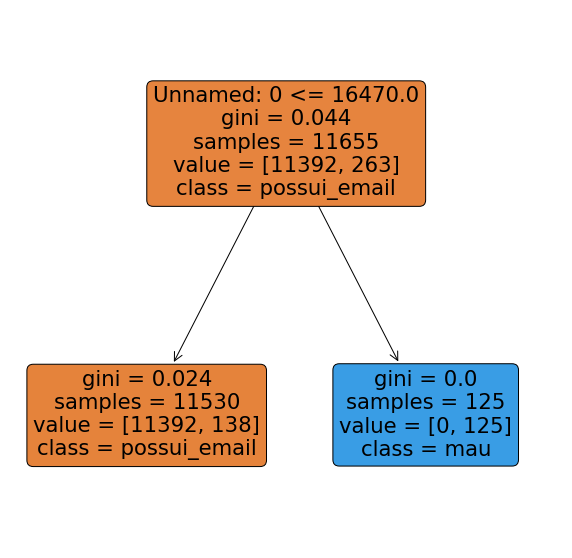

In [36]:
plt.figure(figsize=[10,10])
plot_tree(clf_podada,
         filled=True,
         rounded=True,
         class_names=['possui_email', 'mau'],
         feature_names=x_train.columns);

In [37]:
proponentes_maus= (100*270)/len(df1)
proponentes_maus

1.6216216216216217

In [38]:
df2=df1


In [39]:
df2['bons']=df1['mau']
df2.bons=df2.bons.astype(int)
df2.bons=df2.bons.replace(0, 2)
df2.bons=df2.bons.replace(1, 0)
df2.bons=df2.bons.replace(2, 1)
df2.bons=df2.bons.astype(bool)

In [40]:
df2

,Unnamed: 0,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,...,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents,bons
0,0,0,58.832877,3.106849,1,0,0,0,2.0,False,...,0,0,0,0,1,0,0,0,0,True
1,1,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,1,0,0,1,0,0,0,0,True
2,2,0,52.356164,8.358904,1,0,1,1,1.0,False,...,0,1,0,0,1,0,0,0,0,True
3,3,0,46.224658,2.106849,1,1,1,1,2.0,False,...,0,0,0,0,1,0,0,0,0,True
4,4,0,29.230137,3.021918,1,0,0,0,2.0,False,...,0,0,0,0,1,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,0,54.109589,9.884932,1,0,0,0,2.0,True,...,0,0,0,0,1,0,0,0,0,False
16646,16646,0,43.389041,7.380822,1,1,1,0,2.0,True,...,0,0,0,0,1,0,0,0,0,False
16647,16647,0,30.005479,9.800000,1,1,0,0,2.0,True,...,0,0,0,0,1,0,0,0,0,False
16648,16648,0,30.005479,9.800000,1,1,0,0,2.0,True,...,0,0,0,0,1,0,0,0,0,False


In [41]:
df2=df2.drop('estado_civil_Married', axis=1)

In [42]:
#Exercicio 3.5
X=df2.drop('bons', axis=1)
Y=df2.bons

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [44]:
clf_bons = DecisionTreeClassifier(random_state=100)
clf_bons = clf_bons.fit(X_train,Y_train)

In [301]:
y_chapeu_teste3 = clf_bons.predict(X_train)
y_chapeu_teste3

array([ True,  True,  True, ...,  True,  True,  True])

In [45]:
clf_test_bons = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5 ,random_state=123)
clf_test_bons = clf_test_bons.fit(X_train,Y_train)
predict = clf_test_bons.predict(X_test)
accuracy_score(Y_test, predict)

1.0